# Seminar 005: Working with Pandas

<a href="https://colab.research.google.com/github/JR-1991/PythonProgrammingBio24/blob/main/notebooks/Seminar_005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

------

## Notes

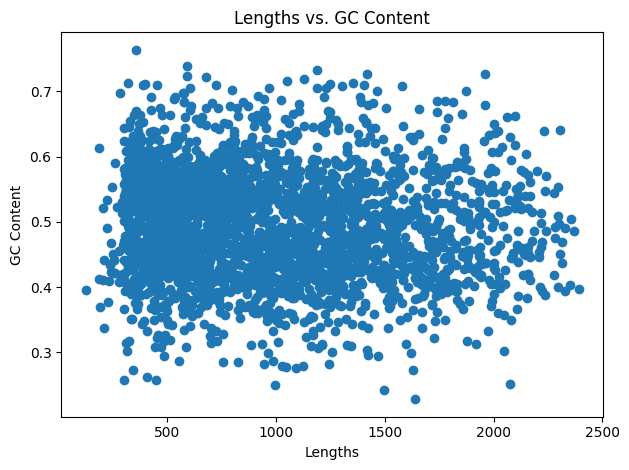

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Matplotlib case for scatter
df = pd.read_csv("https://github.com/JR-1991/PythonProgrammingBio24/raw/main/data/gc_len_data.csv")
f, ax = plt.subplots()

ax.scatter(df["lens"], df["gc"])
ax.set_title("Lengths vs. GC Content")
ax.set_ylabel("GC Content")
ax.set_xlabel("Lengths")

plt.tight_layout()

## Working with Pandas

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

You can display a dataset as a beautiful table inside a Jupyter Notebook by writing the variable name as shown below.

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Data analysis

Pandas alone already provides many options to analyse your data. You can calculate various statistics and even plot data (although not visually pleasing). Most of the time, when working with numerical data, using the `df.describe()` method already gives a great overview.

In [5]:
# General description
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Correlation matrix (Pearson)
df.corr("pearson", numeric_only = True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [7]:
# Correlation matrix (Spearman)
df.corr("spearman", numeric_only = True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.166778,0.881898,0.834289
sepal_width,-0.166778,1.000000,-0.309635,-0.289032
petal_length,0.881898,-0.309635,1.000000,0.937667
petal_width,0.834289,-0.289032,0.937667,1.000000


### Slicing and conditional sorting

Pandas provides a convenient way to extract specific data points by using logical operators within square brackets.

In [10]:
df_setosa = df[df.species == "setosa"]
df_setosa.head(5) # Display the top 5 entries

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
# You can get very specific
df_lengths = df[(df.sepal_length > 7) & (df.petal_length > 6)]
df_lengths

,sepal_length,sepal_width,petal_length,petal_width,species
105,7.6,3.0,6.6,2.1,virginica
107,7.3,2.9,6.3,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
130,7.4,2.8,6.1,1.9,virginica
131,7.9,3.8,6.4,2.0,virginica
135,7.7,3.0,6.1,2.3,virginica


### Visualisation

For a quick visualization of data, Pandas can be sufficient, but bear in mind that the visualizations are basic. On the other hand, Pandas is capable of Parallel Coordinates, which is very powerful!

<Axes: >

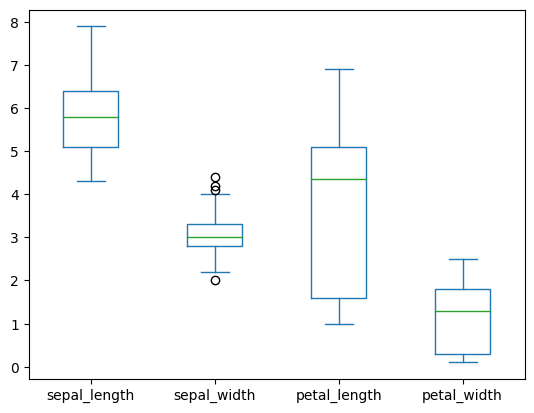

In [14]:
df.plot.box()

<Axes: >

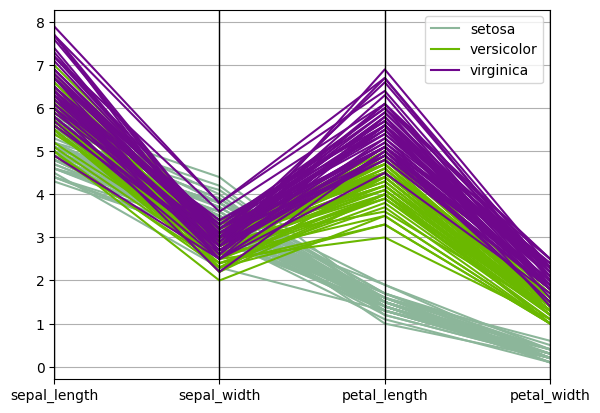

In [15]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(df, "species", alpha=1.0)

### File handling

Aside from `csv` Pandas can also read `XLSX` (Excel) and many other formats to load and write a dataset.

In [ ]:
# Viewable in the browser
df.to_html("Dataset.html")

In [ ]:
# Well known file format
df.to_xml("Dataset.xml")

In [16]:
# Can be used and edited in Excel
df.to_excel("Dataset.xlsx", index=False)

In [17]:
# ... and can be read again
pd.read_excel("Dataset.xlsx", sheet_name="Sheet1")

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
